## Explainable Product Recommender and Workflow Processes
Task: to perform product recommendation to customers and generate recommender workflow
Hypothesis: to check for the existence of product similarity between customers
Method of Recommenndation: user to user collaborative based filtering using cosine similarity algorithm
Data Source: UCI dataset - 'Online_Retail.csv'

- Systmes and libraries setup
- Data Load
- Exploratory Analysis
  - product and customer analysis for mising values, filtering and outliers
- Explainable Product Recomender Workflow and Process Stages
  - features extractions, similarity evaluations, explainable product workflow and performance testing 

In [53]:
# Systems and libraries setup

# import data structure libaries
import pandas as pd
import numpy as np

# import statistical and hypothesis testing libraries
from scipy import stats
import scipy.stats
from sklearn.metrics.pairwise import cosine_similarity

# import visualisations libraries
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns

#set fiqure size to control all plt plottings
plt.rcParams['figure.figsize']=(10,7)


In [54]:
#Data Load  

r_df = pd.read_csv('Online_Retail.csv', encoding = 'latin1')
r_df = r_df.dropna()
print(r_df.shape)
r_df.head(2)   # print sample frame by rows



(406829, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


## Exploratory Analysis
product and customer analysis for mising values, filtering and outliers
  - missing customers checks - if any missing value delete related records
  - filtering customers without negative quantities- extract only customers with product qty greater than zero
  - outlier checks on customers using interquartile range: if any remove outliers data points

Missing value found: 0


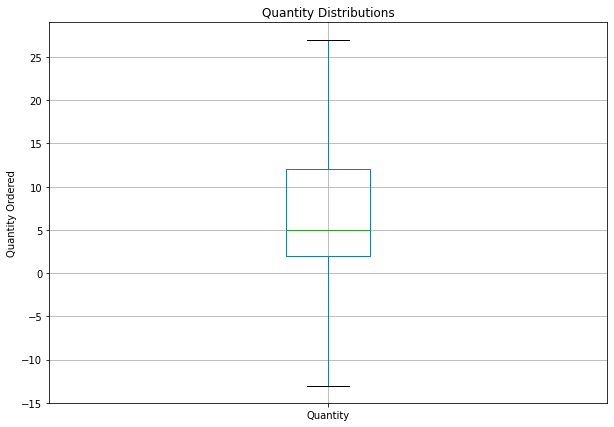

In [55]:
# missing customers checks - if any missing value delete related records
missing_value_chks = r_df['CustomerID'].isna().sum()
print('Missing value found:',(missing_value_chks))

# output explanation:
# returned 0 because no missing value on customerID

# visualise quantity of order distributions by all variables
ax = r_df[['Quantity']].boxplot(
    showfliers = False, figsize = (10,7)
    )

ax.set_ylabel('Quantity Ordered')
ax.set_title('Quantity Distributions')

plt.show()

# explanation:
# existence of negative orders

plt.show()

filtered data size without negative stocks:  (397924, 8)
Unfiltered data size with negative stocks: (406829, 8)


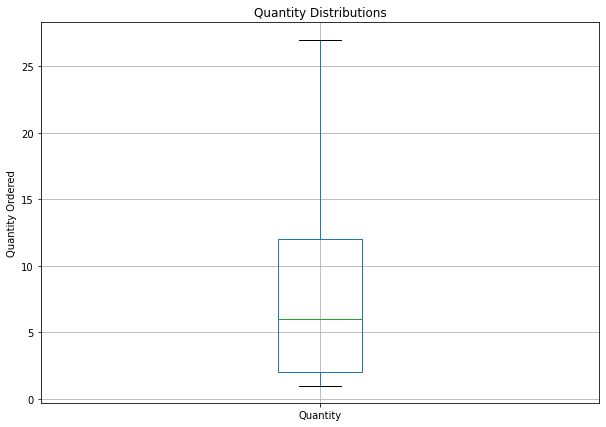

In [56]:
# filtering customers without negative quantities- extract only customers with product qty greater than zero
r1_df = r_df.loc[r_df['Quantity'] > 0]
print('filtered data size without negative stocks: ', (r1_df.shape))  # filtered data
print('Unfiltered data size with negative stocks:', (r_df.shape))   # original data


# visualise quantity of order distributions by all variables
ax = r1_df[['Quantity']].boxplot(
    showfliers = False, figsize = (10,7)
    )

ax.set_ylabel('Quantity Ordered')
ax.set_title('Quantity Distributions')

plt.show()

# explanation:
# no negative orders
plt.show()


AxesSubplot(0.125,0.125;0.775x0.755)


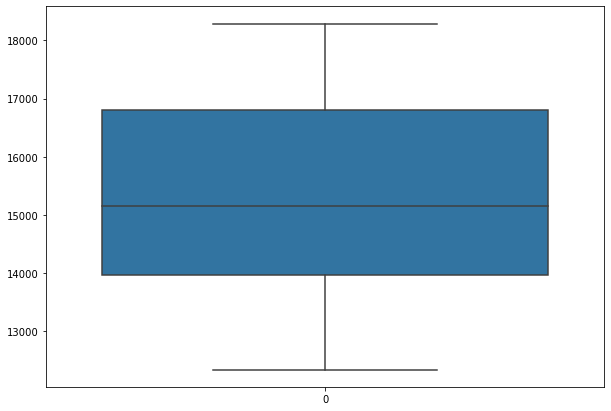

In [57]:
# outlier checks on customers using interquartile range: if any remove outliers data points

outlier_chks =sns.boxplot(data = r1_df['CustomerID'])
print(outlier_chks)

#  output explanation:
# no outlier detected, since there are no data points outside the interquartile range

## Product Recomender Workflow and Process Stages
features extractions, similarity evaluations, explainable product workflow and performance testing  
- features engineering and extraction
  - generate and encode new features
  - customer to product matrix
- evaluation of similarity matrix
  - generate customer to customer product similarity matrix
- Explainable Product Recommender workflow
  - find product similiarity by customers and recommend unsimilar product items to any of the related customers


In [58]:
# features engineering and extraction: generate customer to product matrix

cust_prodt_matrix = p_df.pivot_table(
    index= 'CustomerID',
    columns = 'StockCode',
    values = 'Quantity',
    aggfunc = 'sum'
)

cust_prodt_matrix.head(4)

#  output explanation:
# NAN represent customers that has not bought any corresponding product
# numbers represent customers that has not bought the corresponding product

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [59]:
# features engineering and extraction: features transformation 0 and 1 encoding
# NAN represent customers has not bought the corresponding product with encoding 0
# customer with 1 or more product is assigned to code 1
# transform the features replace with zero

cust_prodt_trans_matrix = cust_prodt_matrix.applymap(lambda x: 1 if x > 0 else 0)

print(cust_prodt_trans_matrix.shape)   # row id showing customer ID

cust_prodt_trans_matrix.head(4)

(4339, 3665)


StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
# evaluation of similarity matrix: generate customer to customer product similarity matrix using cosine similarity pairwise matrix

# generate columns and integrate index to cust_cust sim matrix
sim_index = cust_prodt_trans_matrix.T.columns 

# generate product pairwise matrix
cust_to_cust_similarity_matrix= pd.DataFrame(
    cosine_similarity(cust_prodt_trans_matrix), index = sim_index 
)

print(cust_to_cust_similarity_matrix.shape)

# rename columns with same customer ID
cust_to_cust_similarity_matrix.columns = cust_to_cust_similarity_matrix.index
cust_to_cust_similarity_matrix['CustomerID'] = cust_to_cust_similarity_matrix.index
cust_to_cust_similarity_matrix = cust_to_cust_similarity_matrix.set_index('CustomerID')

# drop row 2 al
cust_to_cust_similarity_matrix.head(3)

(4339, 4339)


CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269


In [61]:
# Recommender workflow processes
# find customers similiarity by items purchase, and recommend items the related customers

# Pick a customer A= 12346.0 and sort related customers from the generated similarity matrix
cust_to_cust_similarity_ranking = cust_to_cust_similarity_matrix.loc[15526.0].sort_values(ascending=False)
print('Order of items similarity by customers:\n', (cust_to_cust_similarity_ranking.head(4)))


# retrieve items bought by the specified customer A 
items_purchase_by_custA = set(cust_prodt_trans_matrix.loc[15526.0].iloc[
    cust_prodt_trans_matrix.loc[15526.0].to_numpy().nonzero()].index
)

print("Item's StockCode that customer A have: ", (items_purchase_by_custA))

# retrieve stock item descriptions for customer A from the main dataframe
p_df.loc[
    p_df['StockCode'].isin(items_purchase_by_custA),['StockCode','Description']
].drop_duplicates().set_index('StockCode')


# retrieve items bought by the specified customer B
items_purchase_by_custB = set(cust_prodt_trans_matrix.loc[12346.0].iloc[
    cust_prodt_trans_matrix.loc[12346.0].to_numpy().nonzero()].index
)

print("Item's StockCode that customer B have: ", (items_purchase_by_custB))

# retrieve stock item descriptions for customer B from the main dataframe
p_df.loc[
    p_df['StockCode'].isin(items_purchase_by_custB),['StockCode','Description']
].drop_duplicates().set_index('StockCode')

# operation to find unique or similar items between both customers
similar_items_between_custA_custB = set.intersection(set(items_purchase_by_custA), set(items_purchase_by_custB))
print("Similar item(s) between_customer and Customer B: ", (similar_items_between_custA_custB))


# operation to find what cust A have and cust B does not have so as to recommend to cust B
recommend_prodt_to_B = items_purchase_by_custA - items_purchase_by_custB
print("Item's StockCode to recommend to customer B: ", (recommend_prodt_to_B))

# explanation:
# Both customers have similar items
# you can recommend dissimilar item to any of the customers
# the closer the customer based on similarity ranking, the more likely the customer can purchase similar the items
 

# retrieve stock item descriptions for customer B from the main dataframe
recommend= p_df.loc[
    p_df['StockCode'].isin(recommend_prodt_to_B), ['StockCode','Description']
].drop_duplicates().set_index('StockCode')

print("Item's StockCode and Descriptions to recommend to customer B:\n", (recommend))


Order of items similarity by customers:
 CustomerID
15526.0    1.000000
12346.0    0.500000
18133.0    0.500000
16498.0    0.258199
Name: 15526.0, dtype: float64
Item's StockCode that customer A have:  {'23397', '23166', '23167', '22501'}
Item's StockCode that customer B have:  {'23166'}
Similar item(s) between_customer and Customer B:  {'23166'}
Item's StockCode to recommend to customer B:  {'23397', '23167', '22501'}
Item's StockCode and Descriptions to recommend to customer B:
                               Description
StockCode                                
22501          PICNIC BASKET WICKER LARGE
23167      SMALL CERAMIC TOP STORAGE JAR 
23397         FOOT STOOL HOME SWEET HOME 
